# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is from [Kagle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). Here is the information (sometimes modified and updated) from Kagle site and [Dataset Options Page](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf). 
> This dataset collects information from ~110K medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 


>|Field Name | Description |
|----|----|
|PatientId | Identification of a patient|
|AppointmentID | Identification of each appointment|
|Gender | Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man.|
|AppointmentDay | The day of the actuall appointment, when they have to visit the doctor.|
|ScheduledDay | The day someone called or registered the appointment, this is before appointment of course.
|Age|How old is the patient.|
|Neighbourhood | Where the appointment takes place.|
|Scholarship | True of False represented as 1 or 0 respectively. Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia |
|Hipertension | True or False represented as 1 or 0 respectively|
|Diabetes | True or False represented as 1 or 0 respectively|
|Alcoholism | True or False represented as 1 or 0 respectively|
|Handcap | True or False represented as 1 or 0 respectively|
|SMS_received | 1 or more messages sent to the patient. True or False represented as 1 or 0 respectively|
|No-show | True or False represented as Yes or No. Notice that  it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up (missed it).|


### Question(s) for Analysis
These are the questions to analyze:
1. Does sending SMS affect showup rate for the appointment? 
> By asking this, we will analyze if show up rate is better for those who received SMS notifications.  
2. Which age group showed up the most? 
> By asking this, we will see how the show up rate looks for different age groups.  

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add'magic word' so that visualizations are plotted
# inline with the notebook. See this page for more:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# This line existed on the template. Going to leave this cell undeleted! 

# Running this cell caused an exception in the df.head(). 
# Checking online the exception, I found this answer: 
# https://github.com/pandas-dev/pandas/issues/26171#issuecomment-517222995
# Hence, ignoring this line with a comment. 

# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
### General Properties

First, let's load the data and see the first couple of lines. This will help us see if we loaded the data correctly and not miss the delimiter. 

In [3]:
# Load the data and see the first couple of lines. 
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's then see the data-types for the different columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Hmmm, a couple of columns have an object data-type. Let's further investigate what `object` data-type means. 

In [5]:
# Let's define a simple utility function and print out the actual data types for 'object' fields in the data frame
def type_(df, columnName):
    """
    Returns the data type of the column in the given Panda's data frame.
    @Param:
        df: pd.DataFrame
        columnName: column name in the dataframe
    @Returns:
        the data type of the given column. 
        Will throw KeyError if the column name doesn't exist in the data frame.
    """
    return type(df[columnName][0])

print(f"""
        Column Name:\tdtype
        Gender\t{type_(df, 'Gender')}
        ScheduledDay\t{type_(df, 'ScheduledDay')}
        AppointmentDay\t{type_(df, 'AppointmentDay')}
        Neighbourhood\t{type_(df, 'Neighbourhood')}
        No-show\t{type_(df, 'No-show')}
    """)


        Column Name:	dtype
        Gender	<class 'str'>
        ScheduledDay	<class 'str'>
        AppointmentDay	<class 'str'>
        Neighbourhood	<class 'str'>
        No-show	<class 'str'>
    


All the columns showing `object` in the `df.info()` are containing `str` instances. `Gender`, `Neighbourhood` and `No-show` are fine to be represented by strings for this analysis. However, `ScheduledDay` and `AppointmentDay` can be converted to Python's datetime object so that it's easy for the analysis and different computations. I will do that later in the `Data Cleaning` section. 

Another interesting thing to notice from the output of `df.info()` is, there are no null values. The dataset has no missing values. 

Let's next check to see what values are set for columns containing numerical values.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As we can see, `Age` has a minimum of -1 (unacceptable for a human age) and a maximum of 115 (which is acceptable). Since the data type is `int64`, we are confident that we don't have floating number ages (something like 10.43). We will do some data cleanup on the `Age` column in the `Data Cleaning` section.

The `Handcap` column in the above table shows values ranging from `min` of 0 to `max` of 4. The column descriptions in [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments) states that `Handcap` contains a `True/False` value. `True/False` can be easily represented in `1/0` format (which is used for the other columns like `Scholarship`, `Diabetes` etc.). To be consistent, we can convert the values in `Handcap` to `1/0` from `0 to 4 range` in the `Data Cleaning` section. The different values and the count of rows can be seen using the following command. 

In [7]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

As can be seen, the column contains either 0, 1, 2, 3 or 4 as a value. It's 0 heavy though (large number of rows contain 0 compared to the others)! We can assume that the non-zero numbers are representing True and 0 is for False. This will be cleaned in the `Data Cleaning` section below. 

Now we have checked the numerical columns, let's check the string containing columns if they contain valid values. 

In [8]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

`Gender` contains only the two valid assumptions (`F` and `M`). This doesn't need any cleanup. 

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

`No-show` also contains the valid `Yes/No` values. This column don't need any cleanup. 

We can not easily determine if `Neighbourhood`, `AppointmentDay`, `ScheduledDay` contains valid values or not. What we will do later is try to convert the two date containing fields to Python's datetime objects and see if something fails for parsing issue (conversion error). If we find an error in the conversion process, then we can see what value that specific row was set and perform cleanup. 


### Data Cleaning

After checking to see the first couple of lines of the data and the data-types of them, it's clear that the appointment and scheduled dates are represented as strings. Since these are holding datetimes, it's easier to manipulate and work with them as Python datetimes than strings. Hence, I am going to convert them to datetime here.

In [10]:
# Convert both ScheduledDay and AppointmentDay to Python's datetime objects.
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)

Since the conversion above went successful without any issue, it answers our question that both `ScheduledDay` and `AppointmentDay` contain valid values (don't need data cleaning). 

One important thing to notice is, AppointmentDay is a date object (not datetime). This is known after the conversion (because it ended up not having time fields because all were 00:00:00 in the given input. It's only showing date, year and months.

The data given has some fields that are irrelevant for our analysis in trying to answer the different questions raised in the next section. For that reason, we can drop those fields here (drop the column). 

> Since `AppointmentId` is irrelevant for our analysis, I'm going to drop it. 

In [11]:
# Drop AppointmentId column
df.drop(['AppointmentID'], axis=1, inplace=True)
# To verify the columns available
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In the exploration phase, we have seen the minimum value for the `Age` column as -1, which is not valid. Let's  further investigate and clean-up this data (either remove or change the age value). First, let's see the number of rows with Age -1. 

In [12]:
# Let's count the number of rows with Age = -1.
df[df['Age'] == -1]['Age'].count()

1

Good, it's only 1 row. Let's see what it contains. 

In [13]:
df[df['Age'] == -1]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


All the other fields look to have valid values. However, we can't infer the `Age` by looking at the other fields and for that, we can drop this row from the data frame. 

In [14]:
# Drop data with Age = -1. 
df.drop(df[df['Age'] == -1].index, inplace=True)

If you see the boolean fields, most of them are represented as either 1 or 0 depending on if they are true or false respectively. However, this is not the case for `Handcap` and `No-show`. The `Handcap` column has one of the values between 0 and 4 (both ends inclusive). Assuming 0 is for false, we can convert the rest (1 <= x <= 4) to 1 to standardize our representation. This is assuming non-zero numbers represent True and 0 is for False. To recap, 

The counts 
0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


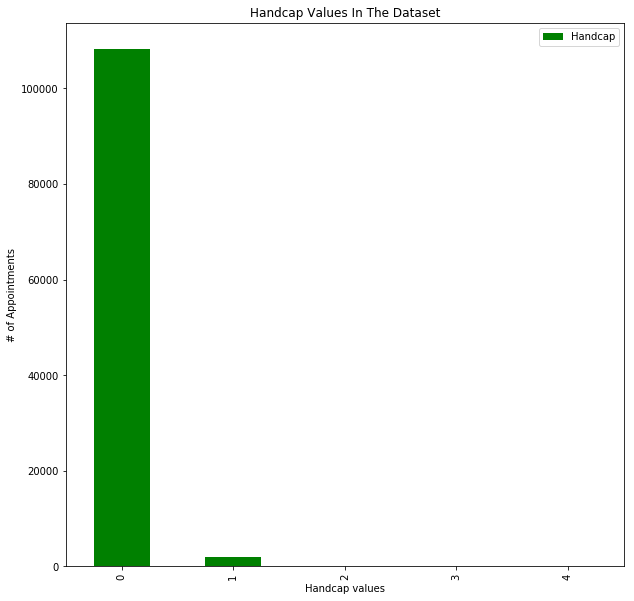

In [15]:
# A function to analyze handcap column in numbers and bar graph. 
def analyze_handcap_values (df):
    handcap_values = df['Handcap'].value_counts()
    print(f'The counts \n{handcap_values}')
    handcap_values.plot(kind='bar', figsize=(10,10), color='green', label='Handcap')
    plt.title('Handcap Values In The Dataset')
    plt.xlabel('Handcap values')
    plt.ylabel('# of Appointments')
    plt.legend();
    
analyze_handcap_values(df)

The above diagram shows the `Handcap` field is 0 heavy, while very little data shows values more than 1 (not visible in the barchart, hence check the printed values above the graph to see the exact counts). Next, let's consolidate non-zero values into 1. 

In [16]:
# Override non-zero values of Handcap column with 1.
df.loc[df['Handcap'] > 0, 'Handcap'] = 1

The counts 
0    108285
1      2241
Name: Handcap, dtype: int64


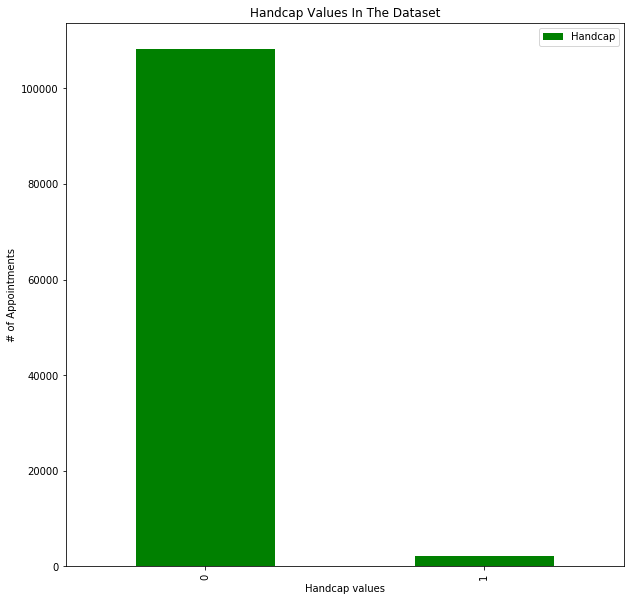

In [17]:
# Let's see if the consolidation worked or not. 
analyze_handcap_values(df)

Now, it's showing as either 0 or 1. 

We can also change the values in the `No-Show` column to 1 or 0 or completely change the column name for ease. However, I still find it clear to explain using the current setting and hence I'm going to leave it as is. 

Finally, we can standardize the column names for easy access. I usually use [camel case](https://en.wikipedia.org/wiki/Camel_case) for my column names. Let's follow that and convert all the remaining column names. I also corrected a possible spelling error in `Handcap` to `HandiCap` (minor correction).

In [18]:
column_names = ['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 
                'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 
                'Alcoholism', 'Handicap', 'SmsReceived', 'NoShow']
df.columns = column_names

<a id='eda'></a>
## Exploratory Data Analysis 
### Does sending an SMS to patients improve show up rate? 

To see the relationship between SMS receival and appointment show up, let's group the data with `NoShow` and `SmsReceived` columns and count the number of row occurrences for each. Then let's plot a bar chat to see their proportion amongst the total data. 

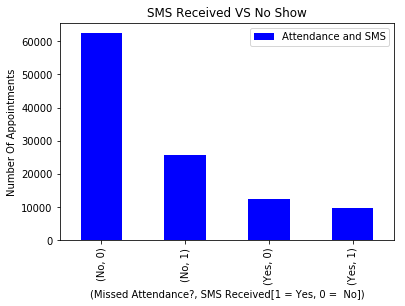

In [19]:
# Group by NoShow and SmsReceived to see the correlation between the two. 
attendance_with_sms_info = df.groupby(['NoShow', 'SmsReceived'])['Gender'].count()
attendance_with_sms_info.plot(kind='bar', color='b', label='Attendance and SMS')
plt.ylabel('Number Of Appointments')
plt.xlabel('(Missed Attendance?, SMS Received[1 = Yes, 0 =  No])')
plt.title('SMS Received VS No Show')
plt.legend();

The bar chart shows the number of appointments and how many of them were missed and not, and further illustrates if people received SMS for that appointment or not. It shows most appointments were attended even without a reminder SMS. But the graph doesn't depict the percentage of people and makes it hard to see and and infer for the smaller values (the ones to the right are too small compared to the first one from the left). Let's draw a more descriptive plot, this time showing how many percentile of the appointments were attended with SMS notification amongst the total attended schedules. 

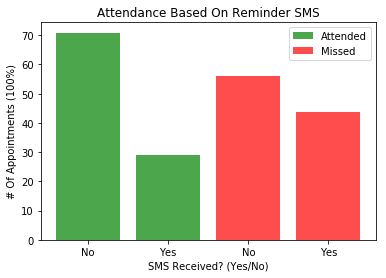

In [20]:
''' Divide the data into two:
             1. Who showed up (with or without SMS)
             2. Who missed it (with or without SMS)
    Then calculate the percentage of people who showed up and
            - received SMS (count_of_showed_up_and_received_sms/count_of_people_who_showed_up)
            - Didn't receive SMS 
    Do the same for people who missed their appointment.
'''
# Take any one column because the rest will contain the same information (I chose Gender).
showed_up = attendance_with_sms_info.loc['No']/attendance_with_sms_info.loc['No'].sum() * 100
missed = attendance_with_sms_info.loc['Yes']/attendance_with_sms_info.loc['Yes'].sum() * 100
xticks = ['No', 'Yes']
plt.bar([1, 2], showed_up, label="Attended", color='g', alpha=0.7)
plt.bar([3, 4], missed, label="Missed", color='r', alpha=0.7)
plt.xlabel("SMS Received? (Yes/No)")
plt.ylabel("# Of Appointments (100%)")
plt.title("Attendance Based On Reminder SMS")
plt.xticks([1, 2, 3, 4], xticks*2)
plt.legend();

What do we see from the diagram above? 

> The Number of people who showed up for their appointment without any SMS received far exceeds (~70%) those who showed up and were interacting with the health institution via SMS (~30%). 

> On the contrary, about 55% of patients who missed their appointments didn't receive any SMS from their healthcare provider, while about 45% did but missed it anyway. 

### Which age group showed up the most?

Let's first see the distribution of `Age` using histogram.

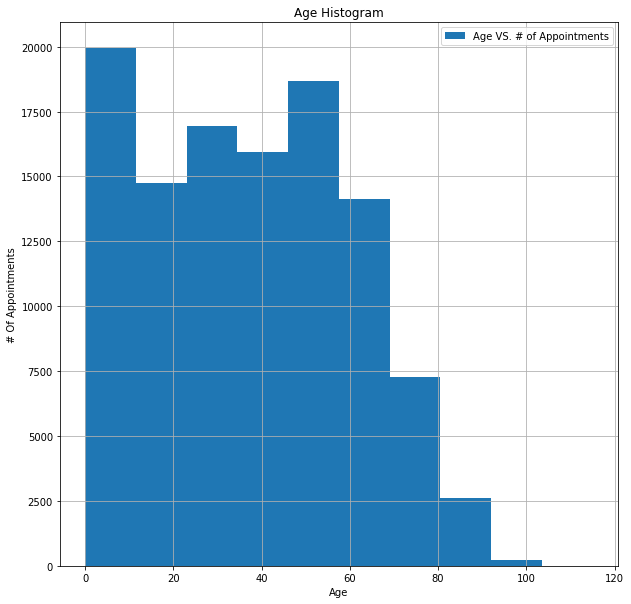

In [21]:
df['Age'].hist(figsize=(10, 10), label='Age VS. # of Appointments')
plt.xlabel('Age')
plt.ylabel('# Of Appointments')
plt.title('Age Histogram')
plt.legend();

From the above histogram, we can see that it's densely populated to the left (skewed to the right). I can make the following four categories of ages to better analyze the pattern:

- Kid: Aged between 0 and 17 (both inclusive)
- Young: Aged between 18 and 36 (both inclusive)
- Adult: Aged between 37 and 54 (both inclusive)
- Senior: Aged above 54 (not inclusive)

With the above 4 categories, the data will be split about evenly. We can store this newly computed value in the dataframe for reuse later. Let's do that in code. 

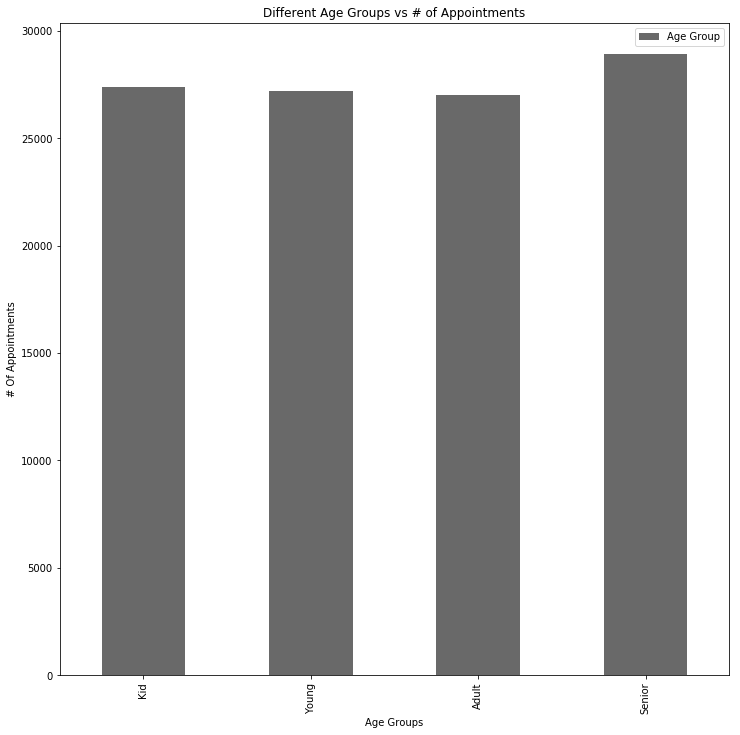

In [22]:
age_labels = ['Kid', 'Young', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=[-1, 17, 36, 54, 120], labels=age_labels)
# To see the split ratio (number of people in an age group), 
df.groupby('AgeGroup').count()['Age'].plot(kind='bar', color='dimgray', label='Age Group', figsize=(12, 12))
plt.xlabel('Age Groups')
plt.ylabel('# Of Appointments')
plt.title('Different Age Groups vs # of Appointments')
plt.legend();

Now we have divided the dataset into 4 almost equal parts by age, let's get the number of people who showed up (and missed) per age group and visualize that. 

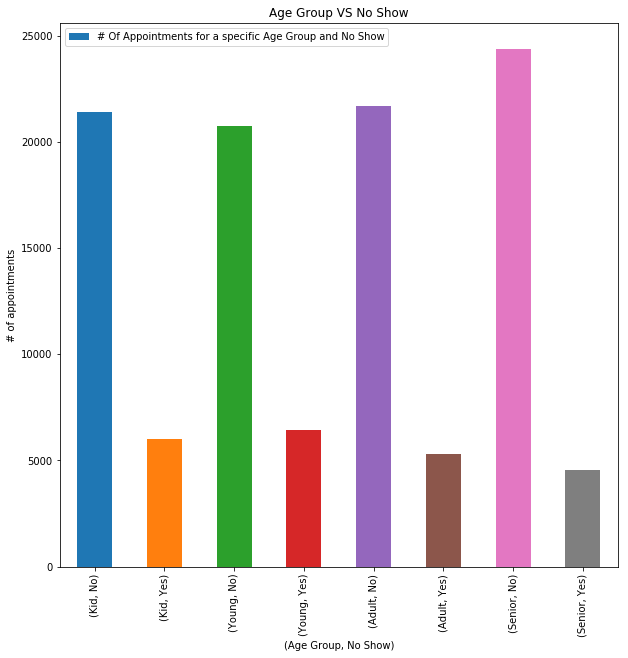

In [23]:
attendance_by_age_group = df.groupby(['AgeGroup', 'NoShow']).count()['Age']
label = '# Of Appointments for a specific Age Group and No Show'
attendance_by_age_group.plot(kind='bar', label=label, figsize=(10, 10))
plt.ylabel('# of appointments')
plt.xlabel('(Age Group, No Show)')
plt.title('Age Group VS No Show')
plt.legend(loc='upper left');

The above diagram shows, 

- More senior people were attentive of their health checkups (because close to 25K appointments were attended and less than 5K were missed)
- More young people were missing their appointments (because slightly more than 5K appointments were missed by young people).

<a id='conclusions'></a>
## Conclusions

### Summary 
To summarize, 
><b>1</b>. The Number of people who showed up for their appointment without any SMS received far exceeds (~70%) those who showed up and were interacting with the health institution via SMS (~30%).

>> On the contrary, about 55% of patients who missed their appointments didn't receive any SMS from their healthcare provider, while about 45% did but missed it anyway.

> This can be a pointer to further investigate the effectivness of sending SMS to patients and the relevance of this investment. Additional information like the date the SMS was sent, the number of SMS sent to a specific patient will be helpful to investigate if reminding about an appointment using SMS is effective or not. 

><b>2</b>. More senior people were attentive of their health checkups compared to other age groups classified in this analysis. On the other hand, more young people were missing their appointments. 

### Limitations
The first limitation is, the dataset doesn't specifiy if the SMS was sent to the patients before the appointment day or close to it. If the date for the notification was available, it would be easy to tell if sending reminders close to the appointment date helps with showup numbers. 

The Second limitation is, the given AppointmentDay field is a date field only. Usually, appointments will have the date and time associated. This would have made it easy to analyze if the appointment times were out of business hours or not. 

In [24]:
# For generating the HTML file for submission. 
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0